# Saskatoon House Listings Exploratory Analysis
This is an exploratory analysis examining the relationship between the number of house listings in Saskatoon and the number of actual house sales. The aim is to examine if this gap is increasing (or not) so as to better understand the potential for a down-turn in the market.

The first data set to be explored, "house-data.csv", was scraped from http://www.saskatoonrealtors.ca/StatisticMonthly.aspx.

First step is importing relevant packages and taking a look at the head of the data frame:

In [154]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd

listings = pd.read_csv("house-data.csv")
print(listings.head())

   Year     Month  Listings  Sales     Avg_Sale
0  2000   January       407    176  $105,543.00
1  2000  February       518    219  $112,632.00
2  2000     March       682    302  $112,275.00
3  2000     April       560    306  $111,985.00
4  2000       May       746    380  $112,661.00


### Converting Avg_Sales to floats
Avg_Sale can not be conveniently plotted in its current form. It needs to be stripped and converted.

In [155]:
listings['Avg_Sale'] = listings['Avg_Sale'].str.replace('$', '')
listings['Avg_Sale'] = listings['Avg_Sale'].str.replace(',', '')
listings['Avg_Sale'] = listings['Avg_Sale'].astype(float)
print(listings.head(10))

   Year      Month  Listings  Sales  Avg_Sale
0  2000    January       407    176  105543.0
1  2000   February       518    219  112632.0
2  2000      March       682    302  112275.0
3  2000      April       560    306  111985.0
4  2000        May       746    380  112661.0
5  2000       June       701    346  115028.0
6  2000       July       612    303  112233.0
7  2000     August       675    338  114242.0
8  2000  September       566    320  108595.0
9  2000    October       485    268  114106.0


### Adding Date-Times
The data is organized by Year and Month, but date-times are needed in order to do a proper time-series.

In [156]:
listings['date_time'] = pd.date_range('2000-01', '2016-07', freq='M')
print(listings.head(5))
print(listings.tail(5))

   Year     Month  Listings  Sales  Avg_Sale  date_time
0  2000   January       407    176  105543.0 2000-01-31
1  2000  February       518    219  112632.0 2000-02-29
2  2000     March       682    302  112275.0 2000-03-31
3  2000     April       560    306  111985.0 2000-04-30
4  2000       May       746    380  112661.0 2000-05-31
     Year     Month  Listings  Sales  Avg_Sale  date_time
193  2016  February      1116    304  331679.0 2016-02-29
194  2016     March      1231    425  347441.0 2016-03-31
195  2016     April      1432    502  343672.0 2016-04-30
196  2016       May      1516    524  353197.0 2016-05-31
197  2016      June      1345    547  354038.0 2016-06-30


## Comparing listings and sales
Lets get a visual of house listings and sales.

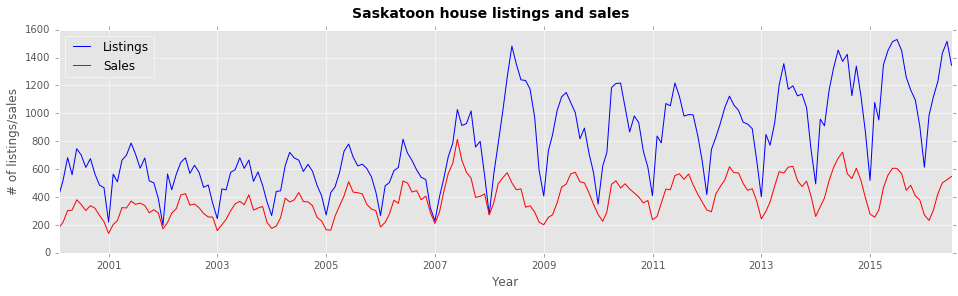

In [157]:
fig = plt.figure(figsize=(16,4))
fig.suptitle('Saskatoon house listings and sales', fontsize=14, fontweight='bold')

ax = fig.add_subplot(111)

ax.set_xlabel('Year')
ax.set_ylabel('# of listings/sales')

plt.plot(listings['date_time'], listings['Listings'], 'b-', label='Listings')
plt.plot(listings['date_time'], listings['Sales'], 'r-', label='Sales')
plt.legend(loc='upper left')
plt.show()

It is curious to see how drastic the gap between listings and sales changed from 2007-2008 as this coincides with the financial crisis in 2008. Furthermore, the above graph is interesting because it shows that since the collapse in 2008, listings have been steadily increasing while sales appear to not be keeping up. Let's confirm this with some calculations and not just our eyes. Below we will calculate the differences between listings and sales and post them in descending order, followed by looking up which specific dates are at the top.

In [158]:
listings_sales_differences = listings['Listings'] - listings['Sales']
print('Index  Difference')
print(listings_sales_differences.sort_values(ascending=False).head())

Index  Difference
196    992
100    980
195    930
185    924
103    908
dtype: int64


In [159]:
print(listings.iloc[196][['Year','Month']]) #largest gap between listings and sales
print(listings.iloc[100][['Year', 'Month']]) #second largest
print(listings.iloc[195][['Year', 'Month']]) #third largest

Year     2016
Month     May
Name: 196, dtype: object
Year     2008
Month     May
Name: 100, dtype: object
Year      2016
Month    April
Name: 195, dtype: object


### Largest gap in listings and sales since 2008
The above confirms that April and May 2016 have the largest gap in listings vs sales since May 2008.

## Average Sales

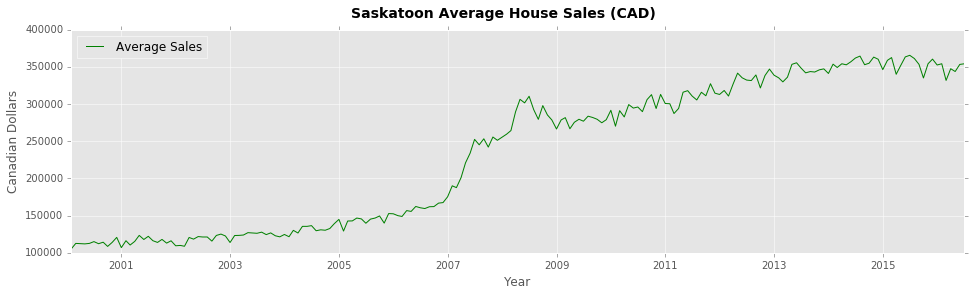

In [160]:
fig = plt.figure(figsize=(16,4))
fig.suptitle('Saskatoon Average House Sales (CAD)', fontsize=14, fontweight='bold')

ax = fig.add_subplot(111)

ax.set_xlabel('Year')
ax.set_ylabel('Canadian Dollars')
plt.plot(listings['date_time'], listings['Avg_Sale'], 'g-', label='Average Sales')
plt.legend(loc='upper left')
plt.show()

What is interesting to see in the above graph is the steady increase in average sales similar to the increase in listings over the same time period and the decrease, around 2015 to now, coinciding with the gap in listings-sales reaching its highest since 2008.

We are, however, lacking in potentially key information. What we can do with the data available to us is to examine if the percentage increases in listings, sales, and average sales are in agreement with Saskatoon's population.

## Yearly percentage changes
We are going to be focusing on the percentage growth for years 2010-2015 because that is what the [City of Saskatoon has readily available](https://www.saskatoon.ca/city-hall/our-performance/performance-dashboard/sustainable-growth/population-growth-and-rate-change). 

The data set, "yearly-house-data.csv", was scraped from http://www.saskatoonrealtors.ca/Statistic_Yearly.aspx.

We will begin by calculating and plotting the yearly percentage changes.

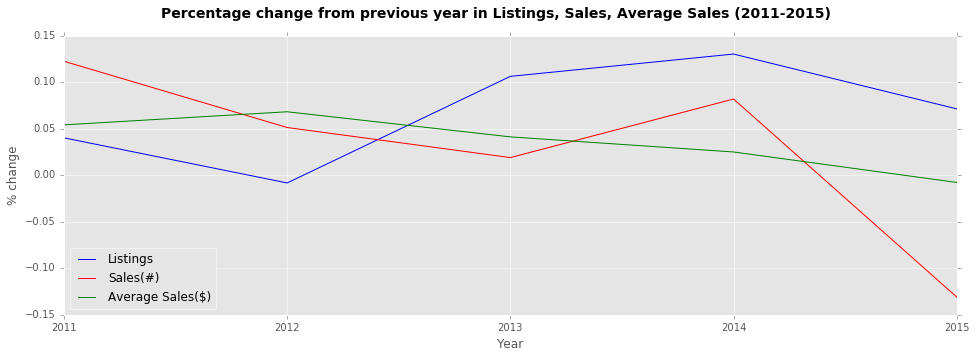

('Avg Listings % change', 6.805259268240797)
('Avg Sales % change', 2.8837021541446473)
('Avg Avg_Sale % change', 3.62536756275373)


In [161]:
yearly = pd.read_csv('yearly-house-data.csv')

fig = plt.figure(figsize=(16,5))
fig.suptitle('Percentage change from previous year in Listings, Sales, Average Sales (2011-2015)', fontsize=14, fontweight='bold')

ax = fig.add_subplot(111)

ax.set_xlabel('Year')
ax.set_ylabel('% change')
plt.plot(yearly['Year'], yearly.pct_change()['Listings'], 'b-', label='Listings')
plt.plot(yearly['Year'], yearly.pct_change()['Sales'], 'r-', label='Sales(#)')
plt.plot(yearly['Year'], yearly.pct_change()['Avg_Sale'], 'g-', label='Average Sales($)')
plt.legend(loc='lower left')
plt.xticks([2011, 2012, 2013, 2014, 2015])
ax.ticklabel_format(useOffset=False)
plt.show()

yearly_pct_change = yearly.pct_change()
print('Avg Listings % change', yearly_pct_change['Listings'].mean()*100)
print('Avg Sales % change', yearly_pct_change['Sales'].mean()*100)
print('Avg Avg_Sale % change', yearly_pct_change['Avg_Sale'].mean()*100)

According to the [City of Saskatoon](https://www.saskatoon.ca/city-hall/our-performance/performance-dashboard/sustainable-growth/population-growth-and-rate-change), Saskatoon's population has increased at an average rate of 3.0% from 2010-2014 and had a similar increase of 2.0% from 2014-2015. Over this same time period we see that house sales and average sales in dollars have matched this (2.88% and 3.6% average growth, respectively) while the number of listings has been growing much more rapidly (6.8% average growth) contributing to the gap we see in listings and sales.

## Where to next
House lisitngs in Saskatoon have been growing at a far more rapid rate than population and sales. The gap between listings and sales is the largest it has been since the collapse in 2008. This is suggesting a potential downturn in the market, and with supply exceeding demand prices should drop too. [Home sales this year are already down](http://www.saskatoonrealtors.ca/Mediarelease/DetailedArticle.aspx?Article=268|1) despite the number of listings continuing to grow, and until this changes we are likely to see prices continue to drop.

For future exploration it would be fruitful to see if the increases in listings and average sales (in dollars) are influenced by factors such as:
* The increased number of new houses in Saskatoon, and how much of them represent the number of houses being listed but not sold.
* How many new houses are being built, or planned to be built, in addition to the increasing number of listings.
* The increase in average wage/income compared to the increase in prcies/listings.
* Any changes in the number of renters vs owners.

Further analysis may have to wait until more of this data becomes readily and publicly available.
